In [70]:
import time
# import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
# from torchvision import datasets
from matplotlib import pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision.transforms.functional as F
from PIL import Image
import os
import cv2
# import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import cv2
import pdb
# from onehot import onehot
import torch
import numpy as np

class VGG16(nn.Module):

    def __init__(self):
        super(VGG16, self).__init__()

        # calculate same padding:
        # (w - k + 2*p)/s + 1 = o
        # => p = (s(o-1) - w + k)/2

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3,
                      out_channels=64,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      # (1(32-1)- 32 + 3)/2 = 1
                      padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64,
                      out_channels=64,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=64,
                      out_channels=128,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128,
                      out_channels=128,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )
        
        self.block_3 = nn.Sequential(
            nn.Conv2d(in_channels=128,
                      out_channels=256,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256,
                      out_channels=256,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256,
                      out_channels=256,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.block_4 = nn.Sequential(
            nn.Conv2d(in_channels=256,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )

        self.block_5 = nn.Sequential(
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=512,
                      kernel_size=(3, 3),
                      stride=(1, 1),
                      padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2),
                         stride=(2, 2))
        )
#          self.classifier = nn.Sequential(
#             nn.Linear(512, 4096),
#             nn.ReLU(True),
#             nn.Dropout(p=0.65),
#             nn.Linear(4096, 4096),
#             nn.ReLU(True),
#             nn.Dropout(p=0.65),
#             nn.Linear(4096, num_classes),
#         )

        for m in self.modules():
            if isinstance(m, torch.nn.Conv2d) or isinstance(m, torch.nn.Linear):
                nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='leaky_relu')
#                 nn.init.xavier_normal_(m.weight)
                if m.bias is not None:
                    m.bias.detach().zero_()

        # self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
        
        

    def forward(self, x):

        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.block_5(x)

#         x = x.view(x.size(0), -1)
#         logits = self.classifier(x)
#         probas = F.softmax(logits, dim=1)
#         return probas

        return x

In [3]:
model_vgg = VGG16()

In [4]:
model_vgg

VGG16(
  (block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential

In [5]:
class FCN(nn.Module):

    def __init__(self, pretrained_net, n_class):
        super().__init__()
        self.n_class = n_class
        self.pretrained_net = pretrained_net
        self.relu    = nn.ReLU(inplace=True)
        self.deconv1 = nn.ConvTranspose2d(512, 512, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn1     = nn.BatchNorm2d(512)
        self.deconv2 = nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn2     = nn.BatchNorm2d(256)
        self.deconv3 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn3     = nn.BatchNorm2d(128)
        self.deconv4 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn4     = nn.BatchNorm2d(64)
        self.deconv5 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn5     = nn.BatchNorm2d(32)
        self.classifier = nn.Conv2d(32, n_class, kernel_size=1)

    def forward(self, x):
        output = self.pretrained_net(x)
        x5 = output  # size=(N, 512, x.H/32, x.W/32)

        score = self.bn1(self.relu(self.deconv1(x5)))     # size=(N, 512, x.H/16, x.W/16)
        score = self.bn2(self.relu(self.deconv2(score)))  # size=(N, 256, x.H/8, x.W/8)
        score = self.bn3(self.relu(self.deconv3(score)))  # size=(N, 128, x.H/4, x.W/4)
        score = self.bn4(self.relu(self.deconv4(score)))  # size=(N, 64, x.H/2, x.W/2)
        score = self.bn5(self.relu(self.deconv5(score)))  # size=(N, 32, x.H, x.W)
        score = self.classifier(score)                    # size=(N, n_class, x.H/1, x.W/1)

        return score  # size=(N, n_class, x.H/1, x.W/1)

In [11]:
fcn_model = FCN(pretrained_net=model_vgg, n_class=2)
fcn_model

FCN32s(
  (pretrained_net): VGG16(
    (block_1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (block_2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), paddi

In [16]:


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

def onehot(data, n):
    buf = np.zeros(data.shape + (n, ))
    nmsk = np.arange(data.size)*n + data.ravel()
    buf.ravel()[nmsk-1] = 1
    return buf

class BagDataset(Dataset):

    def __init__(self, transform=None):
        self.transform = transform 
    def __len__(self):
        return 600
#         return len(os.listdir('cats'))

    def __getitem__(self, idx):
        img_name = os.listdir('cats')[idx]
        imgA = cv2.imread('cats/'+img_name)
#         print(imgA.shape)
        imgA = cv2.resize(imgA, (224, 224))
        imgB = cv2.imread('cat_mask/'+img_name, 0)
        imgB = cv2.resize(imgB, (224, 224))
        imgB = imgB/255
        imgB = imgB.astype('uint8')
        imgB = onehot(imgB, 2)
        imgB = imgB.swapaxes(0, 2).swapaxes(1, 2)
        imgB = torch.FloatTensor(imgB)
        #print(imgB.shape)
        if self.transform:
            imgA = self.transform(imgA)    
        item = {'A':imgA, 'B':imgB}
        return item

bag = BagDataset(transform)


In [12]:
fcn_model = fcn_model.cuda()
criterion = nn.BCELoss().cuda()
optimizer = optim.SGD(fcn_model.parameters(), lr=1e-2, momentum=0.7)

In [14]:
device = torch.device("cuda:0")

In [15]:
fcn_model.to(device)

FCN32s(
  (pretrained_net): VGG16(
    (block_1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (block_2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), paddi

In [17]:
dataloader = DataLoader(bag, batch_size=128, shuffle=True, num_workers=0)
saving_index =0
import time
for epo in range(300):
    saving_index +=1
    index = 0
    epo_loss = 0
    start = time.time()
    for item in dataloader:
        index += 1
        start = time.time()
        input = item['A']
        y = item['B']
        input = torch.autograd.Variable(input)
        y = torch.autograd.Variable(y)

        input = input.cuda()
        y = y.cuda()

        optimizer.zero_grad()
        output = fcn_model(input)#['out']
        output = nn.functional.sigmoid(output)
        loss = criterion(output, y)
        loss.backward()
        iter_loss = loss.data.item()
        epo_loss += iter_loss
        optimizer.step()

        output_np = output.cpu().data.numpy().copy()
        output_np = np.argmin(output_np, axis=1)
        y_np = y.cpu().data.numpy().copy()
        y_np = np.argmin(y_np, axis=1)
        if np.mod(index, 20) ==1:
            print('epoch {}, {}/{}, loss is {}'.format(epo, index, len(dataloader), iter_loss))
    print('epoch loss = %f'%(epo_loss/len(dataloader)))

    if np.mod(saving_index, 5)==1:
        torch.save(fcn_model, 'checkpoints_fcn32_224/fcn_model_{}.pt'.format(epo))
        print('saveing checkpoints_fcn32_224/fcn_model_{}.pt'.format(epo))

C:\Users\00050429\Anaconda3\envs\cloud_env\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0, 1/5, loss is 0.7262904047966003
epoch loss = 0.723282
saveing checkpoints_fcn32_224/fcn_model_0.pt
epoch 1, 1/5, loss is 0.7182540893554688
epoch loss = 0.712833
epoch 2, 1/5, loss is 0.7054622173309326
epoch loss = 0.701035
epoch 3, 1/5, loss is 0.6927695870399475
epoch loss = 0.689360
epoch 4, 1/5, loss is 0.6819342374801636
epoch loss = 0.678753
epoch 5, 1/5, loss is 0.6694582104682922
epoch loss = 0.668723
saveing checkpoints_fcn32_224/fcn_model_5.pt
epoch 6, 1/5, loss is 0.6670499444007874
epoch loss = 0.659466
epoch 7, 1/5, loss is 0.6515343189239502
epoch loss = 0.651423
epoch 8, 1/5, loss is 0.6489395499229431
epoch loss = 0.642406
epoch 9, 1/5, loss is 0.6377913951873779
epoch loss = 0.634827
epoch 10, 1/5, loss is 0.6243413686752319
epoch loss = 0.627549
saveing checkpoints_fcn32_224/fcn_model_10.pt
epoch 11, 1/5, loss is 0.62246173620224
epoch loss = 0.620884
epoch 12, 1/5, loss is 0.6217414736747742
epoch loss = 0.613932
epoch 13, 1/5, loss is 0.6081543564796448
ep

epoch 111, 1/5, loss is 0.13384851813316345
epoch loss = 0.139833
epoch 112, 1/5, loss is 0.1456538736820221
epoch loss = 0.142379
epoch 113, 1/5, loss is 0.13159124553203583
epoch loss = 0.142011
epoch 114, 1/5, loss is 0.13131029903888702
epoch loss = 0.129876
epoch 115, 1/5, loss is 0.12498335540294647
epoch loss = 0.127596
saveing checkpoints_fcn32_224/fcn_model_115.pt
epoch 116, 1/5, loss is 0.12340173870325089
epoch loss = 0.135585
epoch 117, 1/5, loss is 0.16676980257034302
epoch loss = 0.140590
epoch 118, 1/5, loss is 0.1394129991531372
epoch loss = 0.129671
epoch 119, 1/5, loss is 0.11773034930229187
epoch loss = 0.118387
epoch 120, 1/5, loss is 0.11459311097860336
epoch loss = 0.113344
saveing checkpoints_fcn32_224/fcn_model_120.pt
epoch 121, 1/5, loss is 0.11165912449359894
epoch loss = 0.113572
epoch 122, 1/5, loss is 0.11343107372522354
epoch loss = 0.114012
epoch 123, 1/5, loss is 0.11225069314241409
epoch loss = 0.110207
epoch 124, 1/5, loss is 0.10770487785339355
epoch 

epoch loss = 0.052096
saveing checkpoints_fcn32_224/fcn_model_220.pt
epoch 221, 1/5, loss is 0.0583520233631134
epoch loss = 0.056786
epoch 222, 1/5, loss is 0.05133941024541855
epoch loss = 0.049622
epoch 223, 1/5, loss is 0.04843098297715187
epoch loss = 0.050691
epoch 224, 1/5, loss is 0.05031587556004524
epoch loss = 0.053173
epoch 225, 1/5, loss is 0.046450234949588776
epoch loss = 0.048683
saveing checkpoints_fcn32_224/fcn_model_225.pt
epoch 226, 1/5, loss is 0.04815330356359482
epoch loss = 0.050228
epoch 227, 1/5, loss is 0.04639676213264465
epoch loss = 0.049423
epoch 228, 1/5, loss is 0.04841642826795578
epoch loss = 0.049196
epoch 229, 1/5, loss is 0.05476846545934677
epoch loss = 0.050473
epoch 230, 1/5, loss is 0.04930167272686958
epoch loss = 0.049049
saveing checkpoints_fcn32_224/fcn_model_230.pt
epoch 231, 1/5, loss is 0.04726965352892876
epoch loss = 0.053018
epoch 232, 1/5, loss is 0.04772067442536354
epoch loss = 0.053770
epoch 233, 1/5, loss is 0.04703573137521744
e

In [18]:
torch.save(fcn_model, 'checkpoints_fcn32_224/fcn_model_{}.pt'.format(epo))

In [20]:

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
#         img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [21]:

def _generate_color_palette(num_masks: int):
    palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
    return [tuple((i * palette) % 255) for i in range(num_masks)]

In [22]:
from torchvision import utils
from typing import Union, Optional, List, Tuple, BinaryIO, no_type_check

def draw_segmentation_masks(
    image: torch.Tensor,
    masks: torch.Tensor,
    alpha: float = 0.8,
    colors: Optional[Union[List[Union[str, Tuple[int, int, int]]], str, Tuple[int, int, int]]] = None,
) -> torch.Tensor:

    """
    Draws segmentation masks on given RGB image.
    The values of the input image should be uint8 between 0 and 255.
    Args:
        image (Tensor): Tensor of shape (3, H, W) and dtype uint8.
        masks (Tensor): Tensor of shape (num_masks, H, W) or (H, W) and dtype bool.
        alpha (float): Float number between 0 and 1 denoting the transparency of the masks.
            0 means full transparency, 1 means no transparency.
        colors (color or list of colors, optional): List containing the colors
            of the masks or single color for all masks. The color can be represented as
            PIL strings e.g. "red" or "#FF00FF", or as RGB tuples e.g. ``(240, 10, 157)``.
            By default, random colors are generated for each mask.
    Returns:
        img (Tensor[C, H, W]): Image Tensor, with segmentation masks drawn on top.
    """

    if not isinstance(image, torch.Tensor):
        raise TypeError(f"The image must be a tensor, got {type(image)}")
    elif image.dtype != torch.uint8:
        raise ValueError(f"The image dtype must be uint8, got {image.dtype}")
    elif image.dim() != 3:
        raise ValueError("Pass individual images, not batches")
    elif image.size()[0] != 3:
        raise ValueError("Pass an RGB image. Other Image formats are not supported")
    if masks.ndim == 2:
        masks = masks[None, :, :]
    if masks.ndim != 3:
        raise ValueError("masks must be of shape (H, W) or (batch_size, H, W)")
    if masks.dtype != torch.bool:
        raise ValueError(f"The masks must be of dtype bool. Got {masks.dtype}")
    if masks.shape[-2:] != image.shape[-2:]:
        raise ValueError("The image and the masks must have the same height and width")

    num_masks = masks.size()[0]
    if colors is not None and num_masks > len(colors):
        raise ValueError(f"There are more masks ({num_masks}) than colors ({len(colors)})")

    if colors is None:
        colors = _generate_color_palette(num_masks)

    if not isinstance(colors, list):
        colors = [colors]
    if not isinstance(colors[0], (tuple, str)):
        raise ValueError("colors must be a tuple or a string, or a list thereof")
    if isinstance(colors[0], tuple) and len(colors[0]) != 3:
        raise ValueError("It seems that you passed a tuple of colors instead of a list of colors")

    out_dtype = torch.uint8

    colors_ = []
    for color in colors:
        if isinstance(color, str):
            color = ImageColor.getrgb(color)
        colors_.append(torch.tensor(color, dtype=out_dtype))

    img_to_draw = image.detach().clone()
    # TODO: There might be a way to vectorize this
    for mask, color in zip(masks, colors_):
        img_to_draw[:, mask] = color[:, None]

    out = image * (1 - alpha) + img_to_draw * alpha
    return out.to(out_dtype)

In [67]:
def predict_one(img_name):
#     img_name = os.listdir('cats')[id_]
    print(img_name)
    imgA = cv2.imread('cats/'+img_name)
    imgA = cv2.resize(imgA, (224, 224))
    
    imgB = cv2.imread('cat_mask/'+img_name)
    imgB = cv2.resize(imgA, (224, 224))

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    imgA = transform(imgA)
    imgA = torch.autograd.Variable(imgA)
    imgA = imgA.unsqueeze(0)

    y = fcn_model(imgA.cuda())
    y_arr = y.cpu().detach().numpy()
    im = Image.fromarray(np.uint8(y_arr[0,1,:]))
    

    tar = y_arr[0,1,:]
    b = ( tar- np.min(tar))/np.ptp(tar)

    
    mask = b > 0.4

    cat = cv2.imread('cats/'+img_name)
    cat = cv2.resize(cat, (224, 224))
    cat = np.array([cat[:,:,2],cat[:,:,1],cat[:,:,0]])
    cat = torch.from_numpy(cat)

    show(draw_segmentation_masks(cat,masks=torch.from_numpy(mask),alpha=0.7))
    plt.show()

In [57]:
cats = ["000000001319.jpg","000000000599.jpg","000000002471.jpg","000000002988.jpg"]

000000001319.jpg


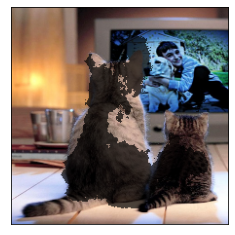

000000000599.jpg


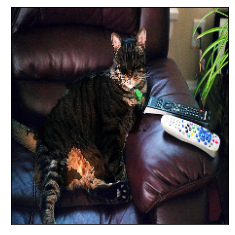

000000002471.jpg


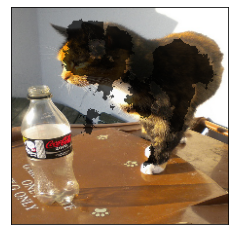

000000002988.jpg


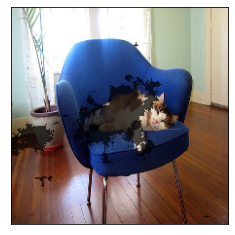

In [68]:
for i in cats:
    predict_one(i)